In [1]:
import json
import requests
from pprint import pprint
from config import api_key
import random
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

In [2]:
rand_latitude = []
rand_longitude = []
total_number = 2000

#generate random latitude and longitude coordinates
for x in range(total_number):
    rand_latitude.append(random.uniform(-90.00,90.00))
    rand_longitude.append(random.uniform(-180,180))
    

In [3]:
city_name = []
city_code = []

#use citipy to find closest cities
for y in range(total_number):
    city = citipy.nearest_city(rand_latitude[y],rand_longitude[y])
    city_name.append(city.city_name)
    city_code.append(city.country_code)
    


In [4]:
#create empty dataframe with column headers
city_info_df = pd.DataFrame(columns=['City Name','City Country','Date','Latitude','Longitude','Temperature (F)',
                                     'Humidity (%)', 'Cloudiness (%)','Wind Speed (mph)'])

#assign arrays to dataframe
city_info_df['City Name']=city_name
city_info_df['City Country']=city_code
city_info_df['Latitude']=rand_latitude
city_info_df['Longitude']=rand_longitude

#reset index of dataframe and drop duplicates
city_info_df_nodupes = city_info_df.drop_duplicates(subset = 'City Name', keep='first',inplace=False)
city_info_df_nodupes=city_info_df_nodupes.reset_index(drop=True)


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

new_size=len(city_info_df_nodupes)

print('Beginning Data Retrieval')
print('-------------------------------------------')

#loop through dataframe calling api and storing results in dataframe
for z in range(len(city_info_df_nodupes)):
    try:
        city = city_info_df_nodupes['City Name'][z]
    except KeyError:
        print(f'Processing record: {z+1}/{new_size} - {city},{city_country}')
        continue
    city_country = city_info_df_nodupes['City Country'][z]
    query_url = f"{url}appid={api_key}&q={city}&,{city_country}&units={units}"
    weather_request = requests.get(query_url)
    response_json = weather_request.json()
    
    if response_json['cod']=='404':
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Temperature (F)')]=float('NaN')
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Humidity (%)')]=float('NaN')
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Cloudiness (%)')]=float('NaN')
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Wind Speed (mph)')]=float('NaN')
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Date')]=float('NaN')
        print(f'Processing record: {z+1}/{new_size} - {city},{city_country}')
    else:
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Temperature (F)')]=response_json['main']['temp_max']
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Humidity (%)')]=response_json['main']['humidity']
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Cloudiness (%)')]=response_json['clouds']['all']
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Wind Speed (mph)')]=response_json['wind']['speed']
        city_info_df_nodupes.iloc[z,city_info_df_nodupes.columns.get_loc('Date')]=response_json['dt']

        print(f'Processing record: {z+1}/{new_size} - {city},{city_country}')

print('-------------------------------------------')
print('End of Data Retrieval')
    
    

Beginning Data Retrieval
-------------------------------------------
Processing record: 1/768 - trojan,bg
Processing record: 2/768 - bethel,us
Processing record: 3/768 - yellowknife,ca
Processing record: 4/768 - illoqqortoormiut,gl
Processing record: 5/768 - rikitea,pf
Processing record: 6/768 - milkovo,ru
Processing record: 7/768 - kahului,us
Processing record: 8/768 - taolanaro,mg
Processing record: 9/768 - kailua,us
Processing record: 10/768 - argayash,ru
Processing record: 11/768 - boyolangu,id
Processing record: 12/768 - susanville,us
Processing record: 13/768 - hobart,au
Processing record: 14/768 - tsiroanomandidy,mg
Processing record: 15/768 - ushuaia,ar
Processing record: 16/768 - ribeira grande,pt
Processing record: 17/768 - alihe,cn
Processing record: 18/768 - marawi,sd
Processing record: 19/768 - saint-philippe,re
Processing record: 20/768 - vaini,to
Processing record: 21/768 - sisophon,kh
Processing record: 22/768 - nikolskoye,ru
Processing record: 23/768 - namibe,ao
Proces

Processing record: 200/768 - honningsvag,no
Processing record: 201/768 - mahebourg,mu
Processing record: 202/768 - la plaine,dm
Processing record: 203/768 - juquila,mx
Processing record: 204/768 - isangel,vu
Processing record: 205/768 - robertsport,lr
Processing record: 206/768 - rock sound,bs
Processing record: 207/768 - dumbea,nc
Processing record: 208/768 - bolungarvik,is
Processing record: 209/768 - santa maria,cv
Processing record: 210/768 - boueni,yt
Processing record: 211/768 - hualmay,pe
Processing record: 212/768 - chokurdakh,ru
Processing record: 213/768 - sentyabrskiy,ru
Processing record: 214/768 - buta,cd
Processing record: 215/768 - elko,us
Processing record: 216/768 - witu,ke
Processing record: 217/768 - bairiki,ki
Processing record: 218/768 - aflu,dz
Processing record: 219/768 - padang,id
Processing record: 220/768 - yirol,sd
Processing record: 221/768 - uvat,ru
Processing record: 222/768 - te anau,nz
Processing record: 223/768 - namatanai,pg
Processing record: 224/768 

Processing record: 400/768 - svetlogorsk,ru
Processing record: 401/768 - messina,za
Processing record: 402/768 - muros,es
Processing record: 403/768 - bulaevo,kz
Processing record: 404/768 - berlevag,no
Processing record: 405/768 - nishihara,jp
Processing record: 406/768 - palabuhanratu,id
Processing record: 407/768 - rocha,uy
Processing record: 408/768 - levelland,us
Processing record: 409/768 - suntar,ru
Processing record: 410/768 - rio gallegos,ar
Processing record: 411/768 - birjand,ir
Processing record: 412/768 - tyret pervaya,ru
Processing record: 413/768 - nantucket,us
Processing record: 414/768 - tucumcari,us
Processing record: 415/768 - vire,fr
Processing record: 416/768 - avera,pf
Processing record: 417/768 - terney,ru
Processing record: 418/768 - harper,lr
Processing record: 419/768 - phan thiet,vn
Processing record: 420/768 - hovin,no
Processing record: 421/768 - jalu,ly
Processing record: 422/768 - mangai,cd
Processing record: 423/768 - svetlyy,ru
Processing record: 424/76

Processing record: 600/768 - palembang,id
Processing record: 601/768 - colares,pt
Processing record: 602/768 - huambo,ao
Processing record: 603/768 - hirara,jp
Processing record: 604/768 - nobres,br
Processing record: 605/768 - baykit,ru
Processing record: 606/768 - tura,ru
Processing record: 607/768 - weligama,lk
Processing record: 608/768 - macas,ec
Processing record: 609/768 - bantou,cn
Processing record: 610/768 - spring hill,us
Processing record: 611/768 - kananga,cd
Processing record: 612/768 - tumannyy,ru
Processing record: 613/768 - luganville,vu
Processing record: 614/768 - hamilton,bm
Processing record: 615/768 - skalistyy,ru
Processing record: 616/768 - derzhavinsk,kz
Processing record: 617/768 - chamba,in
Processing record: 618/768 - esperance,au
Processing record: 619/768 - tidore,id
Processing record: 620/768 - parakan,id
Processing record: 621/768 - prado,br
Processing record: 622/768 - murray bridge,au
Processing record: 623/768 - srandakan,id
Processing record: 624/768

In [6]:
#drop NaNs in dataframe and reset index
city_info_df_nodupes_postapi = city_info_df_nodupes.dropna()
city_info_df_nodupes_postapi = city_info_df_nodupes_postapi.reset_index(drop=True)

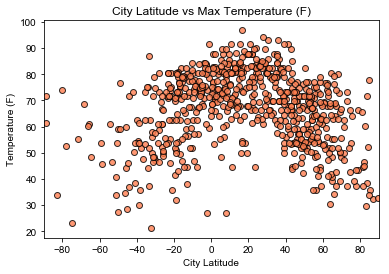

In [7]:
#create scatterplot with temp and latitude
temp_scatter = plt.scatter(city_info_df_nodupes_postapi['Latitude'],
            city_info_df_nodupes_postapi['Temperature (F)'], c="coral",edgecolors="black", alpha=.8)
plt.title('City Latitude vs Max Temperature (F)')
plt.xlabel('City Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(-90,90)

plt.style.use('seaborn')
plt.savefig('Latitude_vs_Temp')

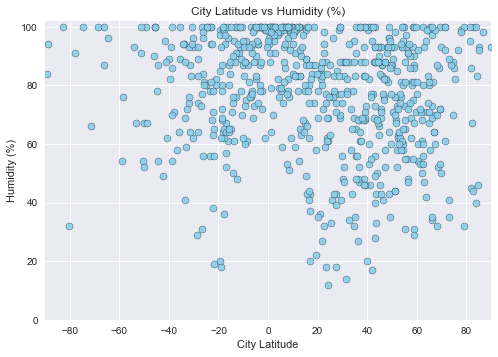

In [8]:
#create scatterplot with humidity and latitude

humid_scatter = plt.scatter(city_info_df_nodupes_postapi['Latitude'],
            city_info_df_nodupes_postapi['Humidity (%)'], c="skyblue",edgecolors="black", alpha=.9)
plt.title('City Latitude vs Humidity (%)')
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')

plt.xlim(-90,90)
plt.ylim(0,102)

plt.style.use('seaborn')

plt.savefig('Latitude_vs_Humidity')

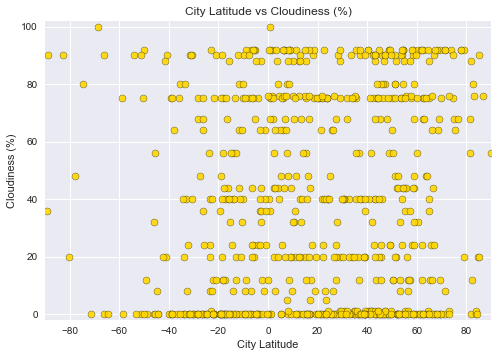

In [9]:
#create scatterplot with cloudiness and latitude

cloud_scatter = plt.scatter(city_info_df_nodupes_postapi['Latitude'],
            city_info_df_nodupes_postapi['Cloudiness (%)'], c="gold",edgecolors="black", alpha=.9)
plt.title('City Latitude vs Cloudiness (%)')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')

plt.xlim(-90,90)
plt.ylim(-2,102)

plt.style.use('seaborn')
plt.savefig('Latitude_vs_Cloudiness')

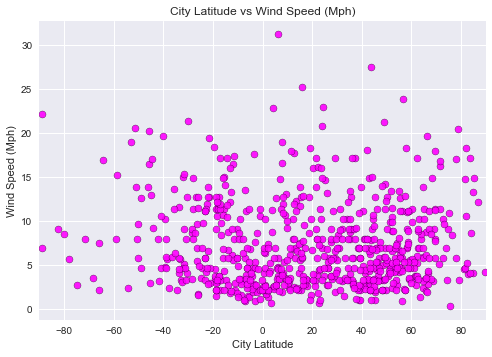

In [10]:
#create scatterplot with wind speed and latitude

wind_scatter = plt.scatter(city_info_df_nodupes_postapi['Latitude'],
            city_info_df_nodupes_postapi['Wind Speed (mph)'], c="magenta",edgecolors="black", alpha=.9)
plt.title('City Latitude vs Wind Speed (Mph)')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (Mph)')

plt.xlim(-90,90)


plt.style.use('seaborn')
plt.savefig('Latitude_vs_Wind_Speed')

In [21]:
#Observations:
# The hottest cities (>90 degrees) have a mean latitude of 23; lying between 0 and 40 latitude/ mean longitude of 25; lying between -5 and 75.
# Cloud coverage and wind speed doesn't seem to have a correlation in relation to the equator
# The least humid places are between 15 and 40 latitude

#created dataframe to look at the relationship of hot cities
hot_cities_df=city_info_df_nodupes_postapi.loc[city_info_df_nodupes_postapi['Temperature (F)']>90,:]
hot_cities_df.describe()


,Latitude,Longitude
count,10.000000,10.000000
mean,23.747353,50.684377
std,13.613652,79.510882
min,-1.137243,-125.685007
25%,15.882933,5.132920
50%,24.344069,73.502904
75%,34.657973,113.966921
max,41.161153,124.120780


(-180, 180)

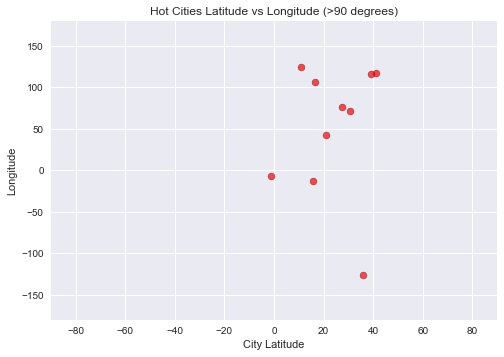

In [22]:
#create scatterplot for hot cities with latitude and longitude

plt.scatter(hot_cities_df['Latitude'],
            hot_cities_df['Longitude'], c="red",edgecolors="black", alpha=.7)
plt.title('Hot Cities Latitude vs Longitude (>90 degrees)')
plt.xlabel('City Latitude')
plt.ylabel('Longitude')

plt.xlim(-90,90)
plt.ylim(-180,180)

In [13]:
#generate output file with results
city_info_df_nodupes_postapi.to_csv('api_output.csv', sep=',')

In [14]:
#.gitignore